In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def chessboard_detect_new(image_path):
  for i,image_path in enumerate(name_image):
      image_paths = "/content/drive/MyDrive/Colab Notebooks/Image_processing/Data/" + image_path

      # Đọc ảnh gốc
      image = cv2.imread(image_paths)

      # Hiển thị ảnh gốc
      plt.figure()
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title('Ảnh gốc')
      plt.axis('off')

      # Giai đoạn tiền xử lý
      #chuyển ảnh xám
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      plt.figure()
      plt.imshow(gray, cmap='gray')
      plt.title('Ảnh xám')
      plt.axis('off')
      # Áp dụng bộ lọc thông tần số thấp để loại bỏ nhiễu sóng hình sin và tăng độ sắc nét
      dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
      dft_shift = np.fft.fftshift(dft)
      magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
      threshold = np.max(magnitude_spectrum) * 0.02
      rows, cols = gray.shape
      crow, ccol = int(rows / 2), int(cols / 2)
      mask = np.zeros((rows, cols, 2), np.uint8)
      rectangle = cv2.rectangle(mask, (ccol - 8, crow), (ccol - 7, crow + 1), 255, -1)
      rectangle = cv2.rectangle(mask, (ccol + 8, crow), (ccol + 9, crow + 1), 255, -1)
      mask = cv2.bitwise_not(mask)
      fshift = dft_shift * mask
      fshift = np.fft.ifftshift(fshift)
      image_filtered = cv2.idft(fshift)
      image_filtered = cv2.magnitude(image_filtered[:, :, 0], image_filtered[:, :, 1])
      plt.figure()
      plt.imshow(image_filtered, cmap='gray')
      plt.title('Ảnh sau khi qua bộ lọc thông thấp')
      plt.axis('off')

      # Loại bỏ nhiễu muối tiêu và tăng độ sáng tương phản
      norm = cv2.normalize(image_filtered, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U )
      median = cv2.medianBlur(norm, 7)
      image_contrast = cv2.convertScaleAbs(median, alpha=1.5, beta=9)

      # Hiển thị ảnh sau giai đoạn tiền xử lý
      plt.figure()
      plt.imshow(image_contrast, cmap='gray')
      plt.title('Ảnh sau khi loại bỏ nhiễu muối tiêu và tăng độ tương phản')
      plt.axis('off')

      # Giai đoạn phát hiện cạnh
      edges = cv2.Canny(image_contrast, 50, 150, apertureSize=3)
      lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

      # Tính toán số hàng và số cột
      num_rows = 0
      num_cols = 0

      if lines is not None:
          for line in lines:
              rho, theta = line[0]
              if np.isclose(theta, 0, atol=np.pi / 4):
                  num_rows += 1
              elif np.isclose(theta, np.pi / 2, atol=np.pi / 4):
                  num_cols += 1

      print("Số hàng:", num_rows)
      print("Số cột:", num_cols)

      # Hiển thị ảnh sau giai đoạn phát hiện góc
      plt.figure()
      plt.imshow(edges, cmap='gray')
      plt.title('Ảnh sau giai đoạn phát hiện góc')
      plt.axis('off')

      # Hiển thị tất cả các hình ảnh
      plt.show()


Số hàng: 11
Số cột: 19


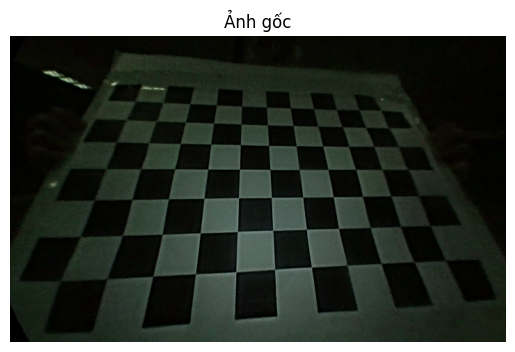

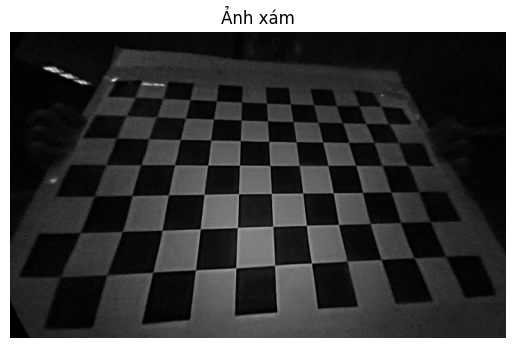

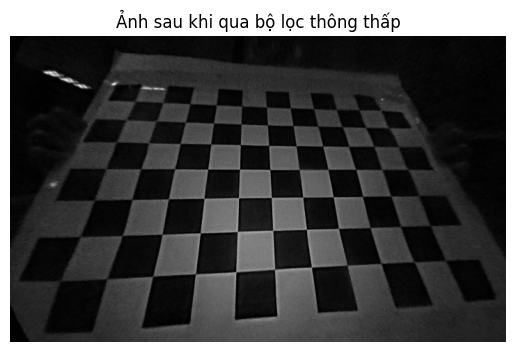

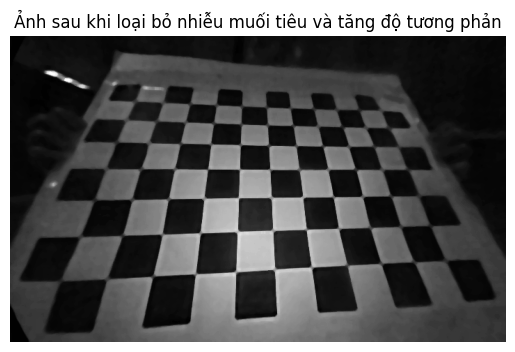

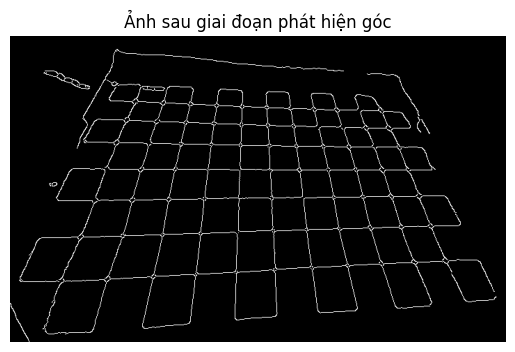

Số hàng: 7
Số cột: 18


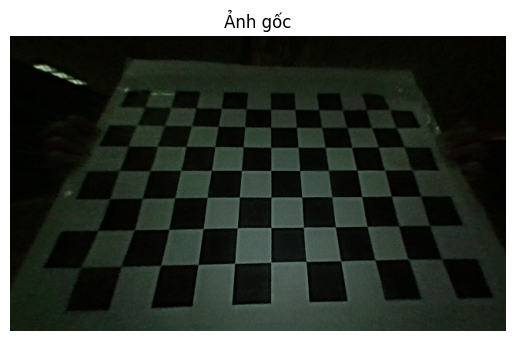

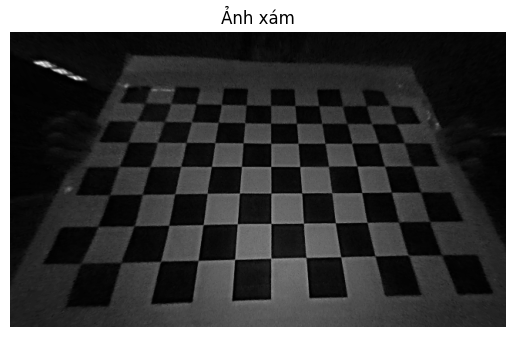

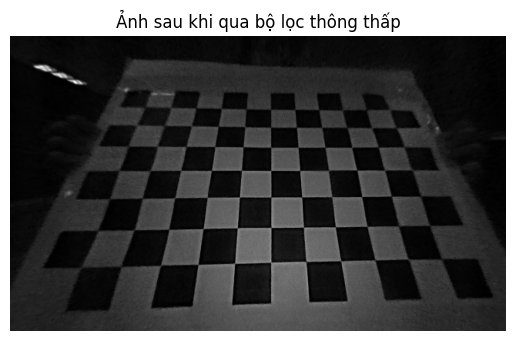

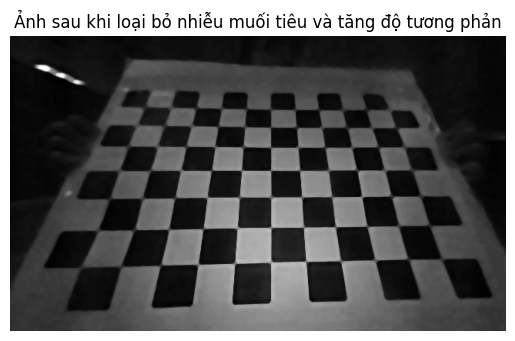

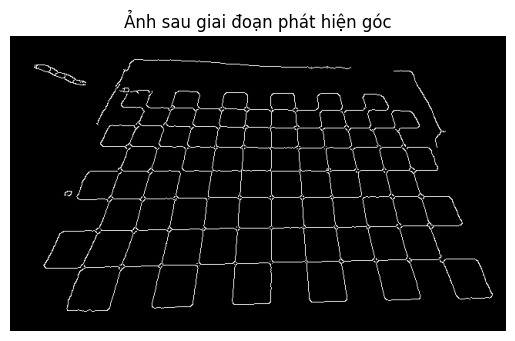

Số hàng: 5
Số cột: 15


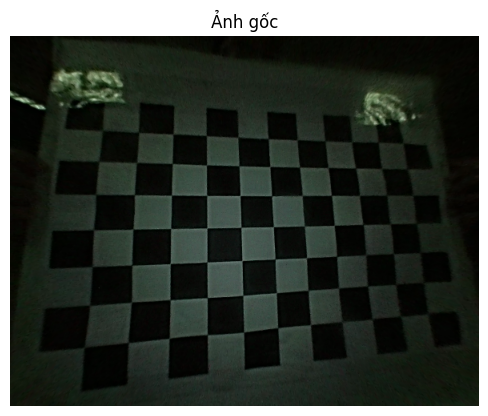

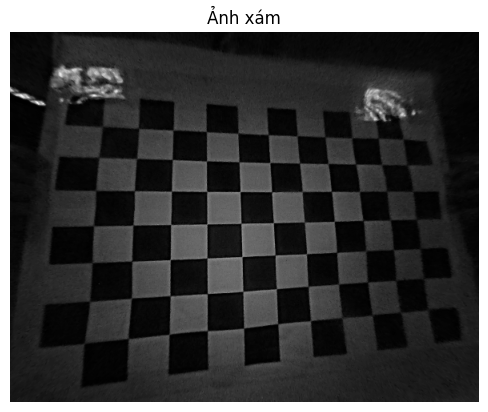

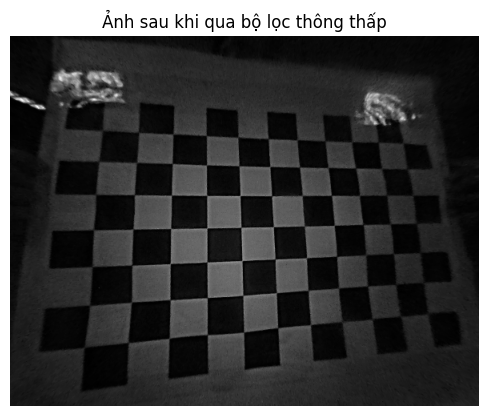

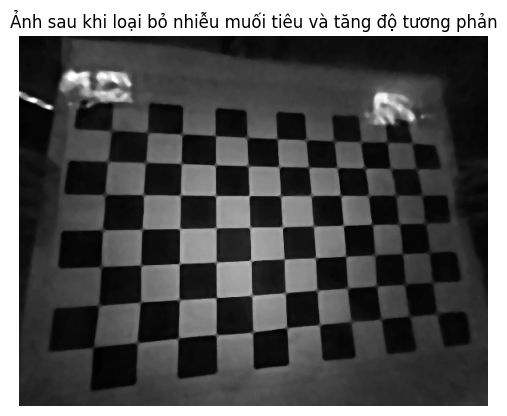

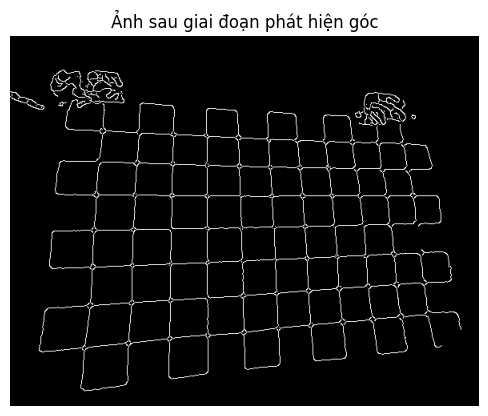

Số hàng: 13
Số cột: 21


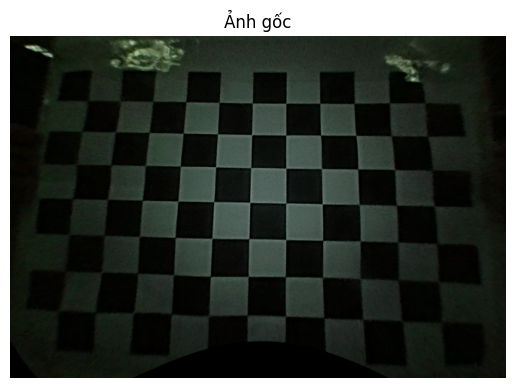

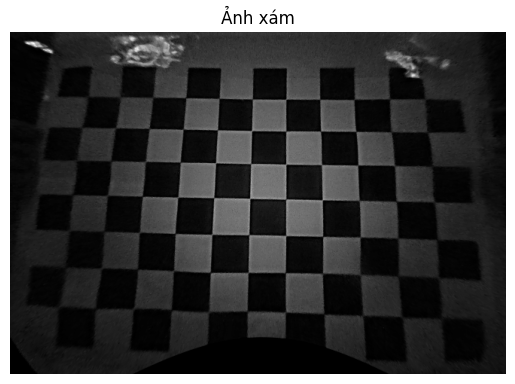

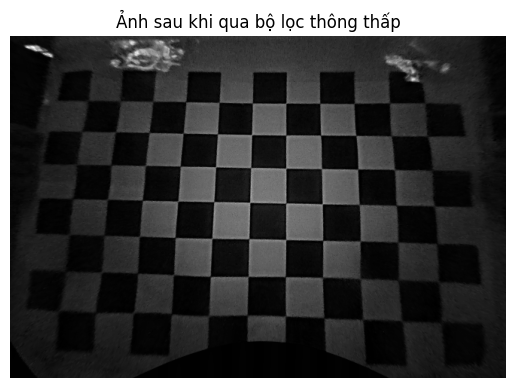

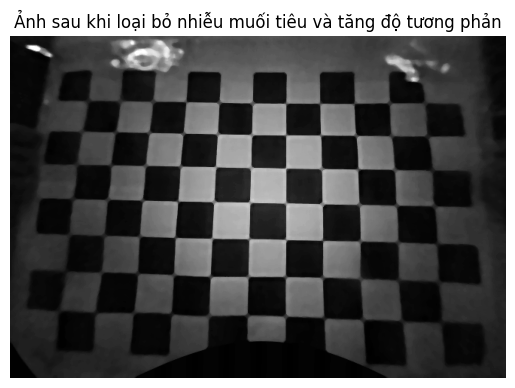

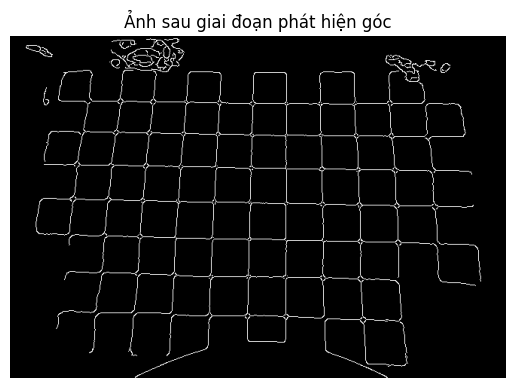

Số hàng: 17
Số cột: 22


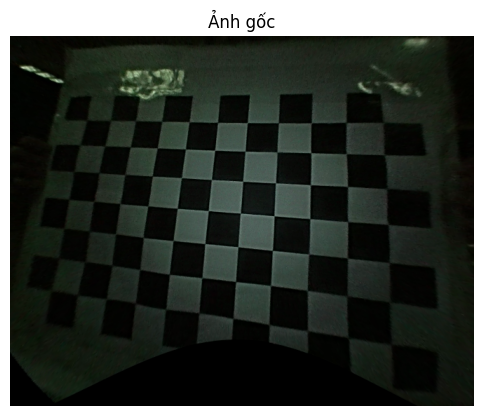

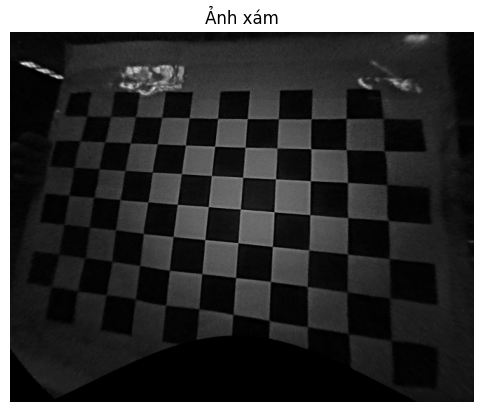

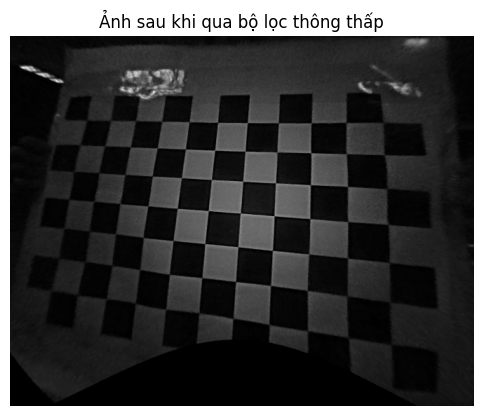

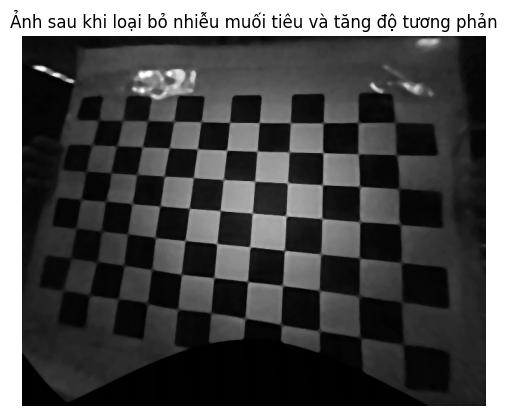

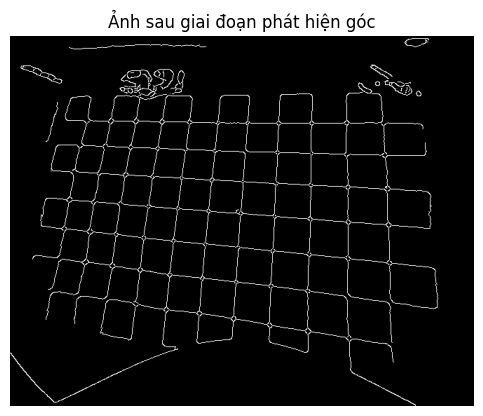

Số hàng: 9
Số cột: 18


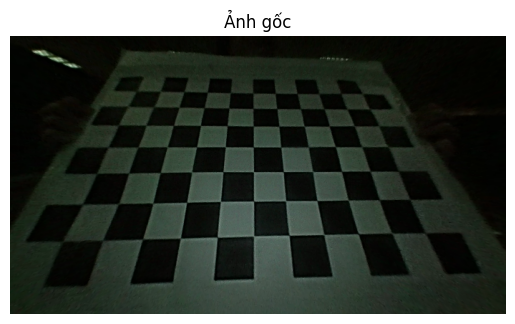

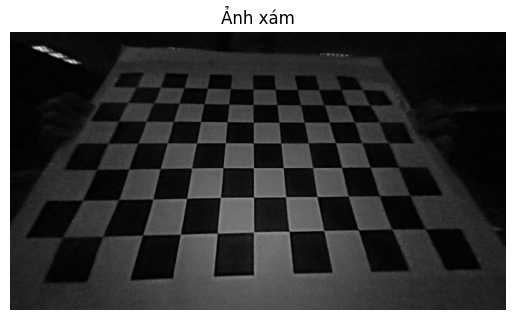

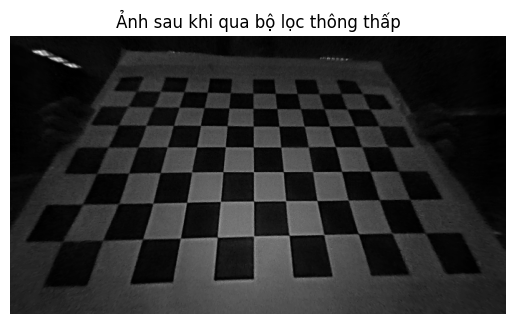

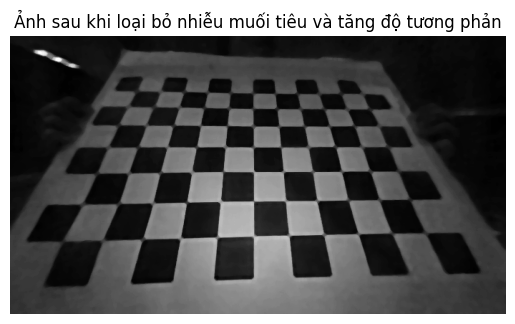

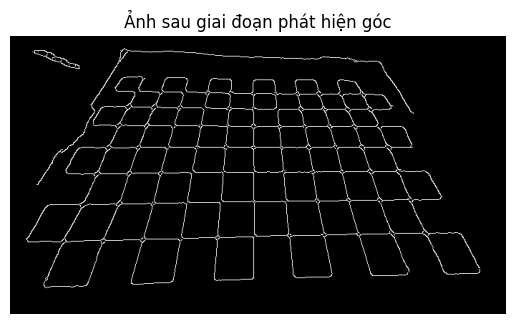

Số hàng: 6
Số cột: 18


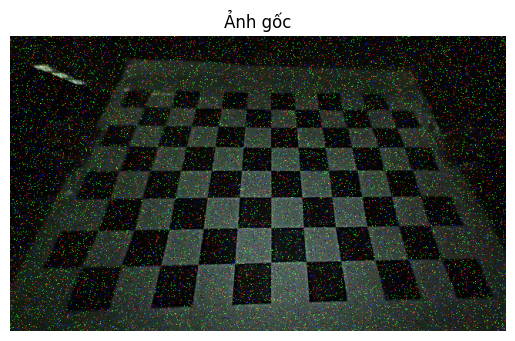

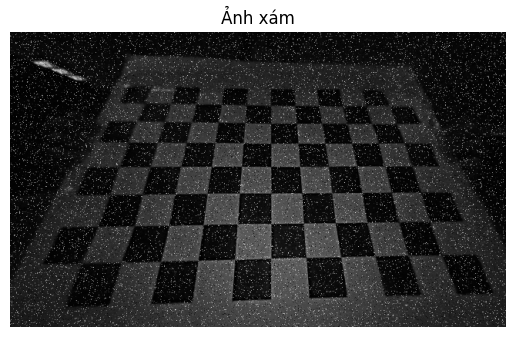

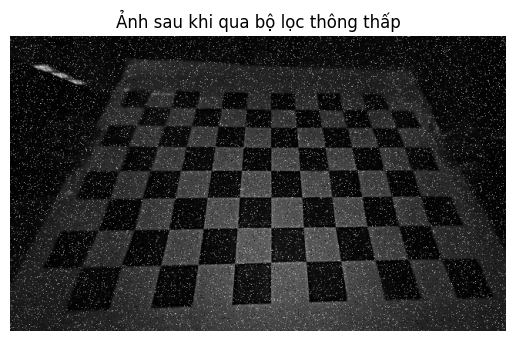

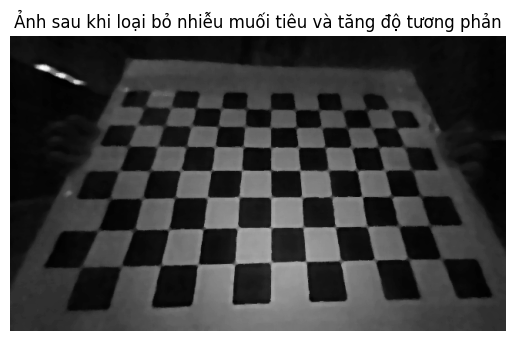

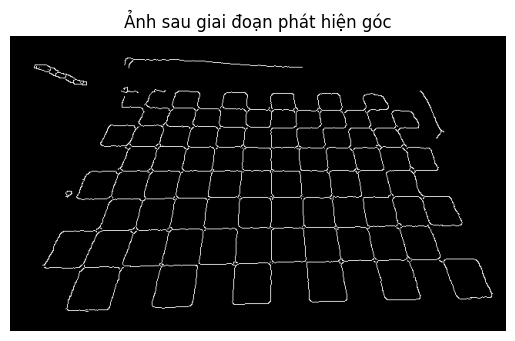

Số hàng: 4
Số cột: 15


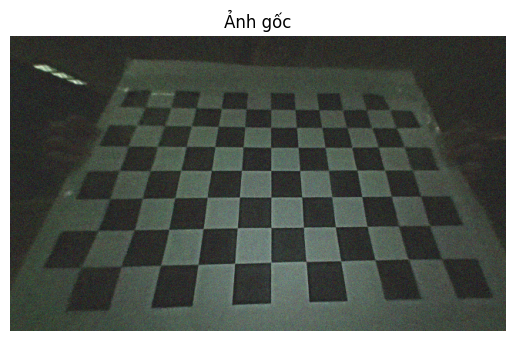

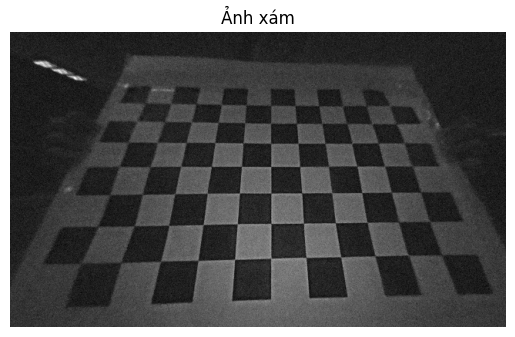

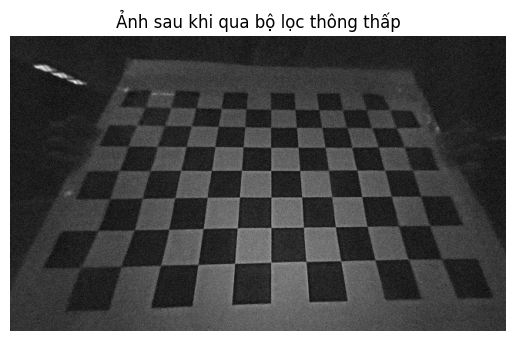

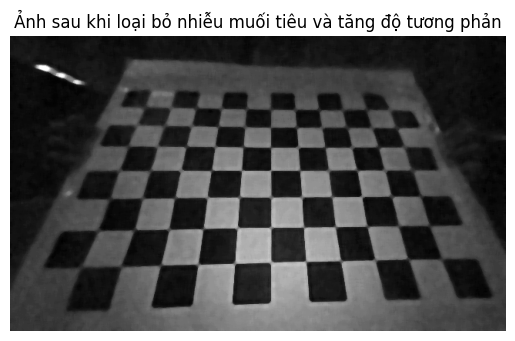

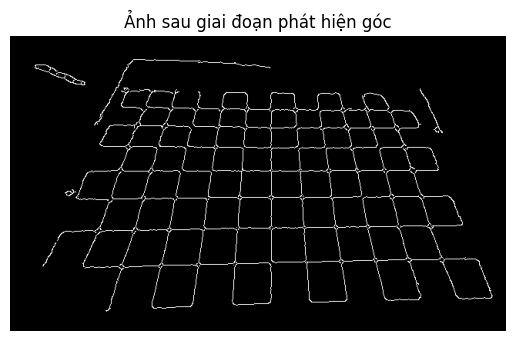

Số hàng: 11
Số cột: 18


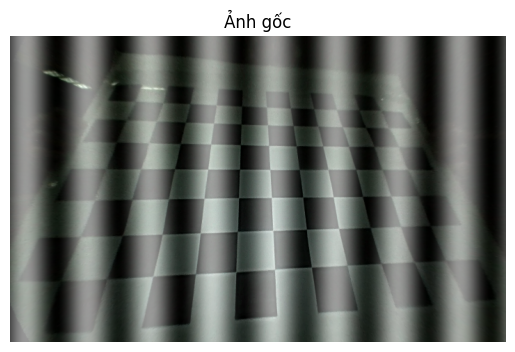

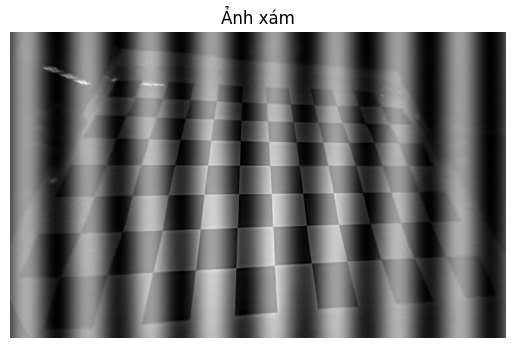

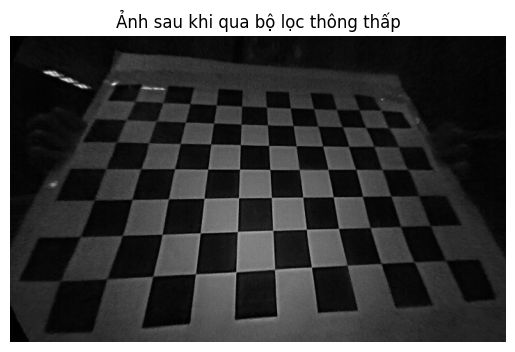

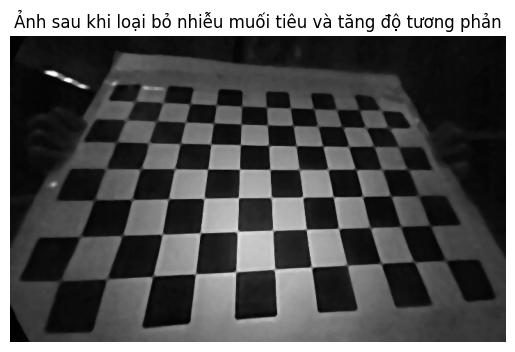

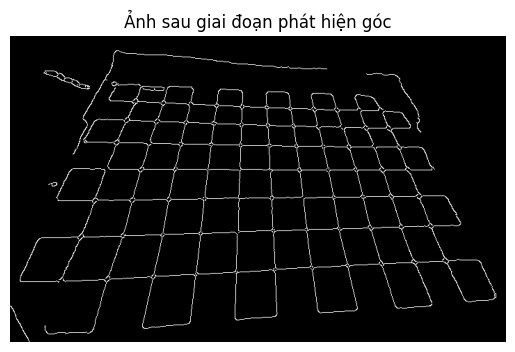

Số hàng: 10
Số cột: 11


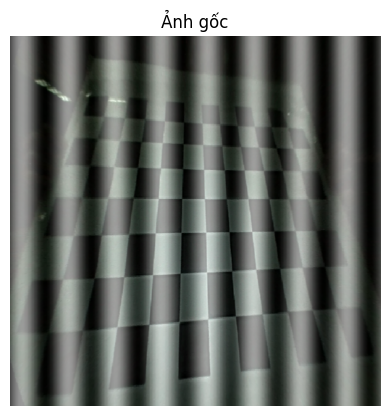

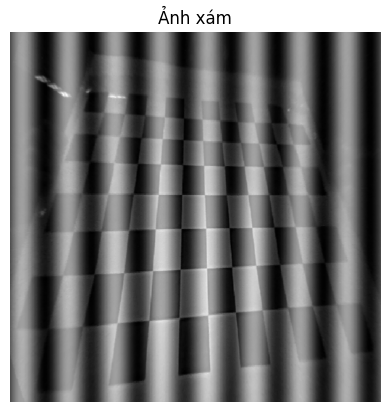

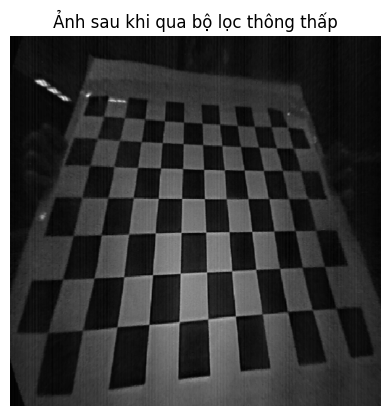

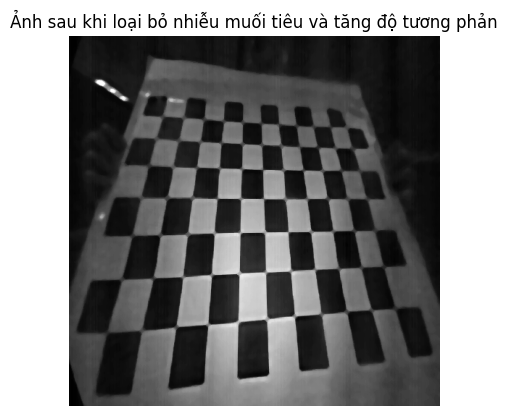

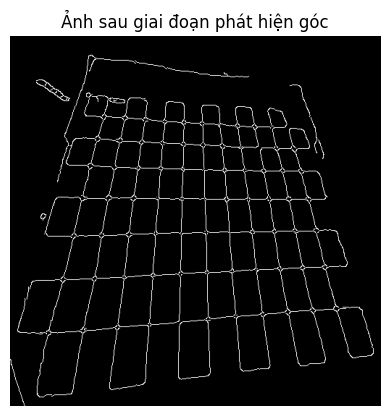

In [ ]:
name_image = os.listdir("/content/drive/MyDrive/Colab Notebooks/Image_processing/Data")
chessboard_detect_new(name_image)

In [ ]:
import skimage.exposure

#doc anh va chuyen qua anh xam
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Image_processing/Data/Chessboard0631.png")
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#lay ra chieu rong,chieu cao
w, h = gray.shape[:2]

#chuyen sang dang float
image_float = gray.astype(np.float32)

#fourier transform
dft = cv2.dft(image_float, flags=cv2.DFT_COMPLEX_OUTPUT)

#dich chuyen trung tam pho tan so
dft_shift = np.fft.fftshift(dft)

#tinh pho tan so
#magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

#khoi tao mask
rows, cols = gray.shape
mask = np.zeros((rows,cols,2), np.uint8)

#ve 2 hcn trang, moi hcn co 1 canh nam o trung tam grayscale => loai bo tan so trung tam cua anh trog kg tan so
rectangle = cv2.rectangle(mask, (int(w/2)-8, int(h/2)), (int(w/2)-7, int(h/2)+1), 255, -1)
rectangle = cv2.rectangle(mask, (int(w/2)+8, int(h/2)), (int(w/2)+9, int(h/2)+1), 255, -1)

#dao nguoc mask
mask = 1 - mask

#nhan pho dich chuyen vs mask => loai bo tan so trung tam
fshift = dft_shift * mask

#dich chuyen nguoc lai trung tam pho tan so
f_shift = np.fft.ifftshift(fshift)

#inverse fourier transform
img_back = cv2.idft(f_shift)

#tinh toan bien do cua anh tren phan thuc vs ao
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.show()
